## MNIST数据集分类 - 神经网络##  
参考: 
1. Giancarlo Zaccone, Getting Started with TensorFlow, 2016.
2. 一文读懂tensorflow基础，https://baijiahao.baidu.com/s?id=1574555070364620&wfr=spider&for=pc
3. 深度学习入门必须理解这25个概念, http://blog.csdn.net/pangjiuzala/article/details/72630166

### 准备数据和定义模型变量

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

'''
one_hot：一个长度为n的数组，只有一个元素是1，其他元素是0。
比如为了表示0..9个数字，数字1的one hot编码为[0 1 0 0 0 0 0 0 0 0]
数字9的one hot编码为[0 0 0 0 0 0 0 0 1 0]
'''
mnist = input_data.read_data_sets(r'D:\Code\GitHub\notebook\datasets\mnist', one_hot=True)

Extracting D:\Code\GitHub\notebook\datasets\mnist\train-images-idx3-ubyte.gz
Extracting D:\Code\GitHub\notebook\datasets\mnist\train-labels-idx1-ubyte.gz
Extracting D:\Code\GitHub\notebook\datasets\mnist\t10k-images-idx3-ubyte.gz
Extracting D:\Code\GitHub\notebook\datasets\mnist\t10k-labels-idx1-ubyte.gz


### 单层感知器 ###

Epoch: 0000 cost= 1.176939924
Epoch: 0005 cost= 0.440896210
Epoch: 0010 cost= 0.383355672
Epoch: 0015 cost= 0.357253010
Epoch: 0020 cost= 0.341465503
Epoch: 0025 cost= 0.330545862
Epoch: 0030 cost= 0.322304287
Epoch: 0035 cost= 0.315921123
Epoch: 0040 cost= 0.310714585
Epoch: 0045 cost= 0.306378129
Trainig phase finished!


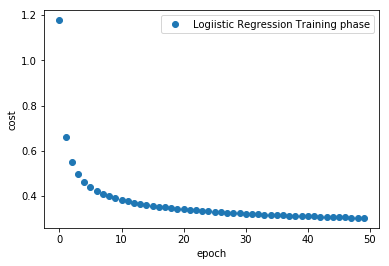

Model accuracy: 0.9192


In [2]:
# 学习率
learning_rate = 0.01
# epoch为向前和向后传播中所有批次的单次训练迭代
training_epochs = 50
# 在训练神经网络的同时，不用一次发送整个输入，一般将输入分成几个随机大小相等的块。与整个数据集一次性馈送到网络时建立的模型相比，批量训练数据使得模型更加广义化。
batch_size = 100
# 控制输出打印频率
display_step = 5

# 定义输入图的占位符
x = tf.placeholder('float', [None, 784])
# 定义实际分类标签的占位符
y_ = tf.placeholder('float', [None, 10])

# 权重矩阵
W = tf.Variable(tf.zeros([784, 10]))
# 偏置向量
b = tf.Variable(tf.zeros([10]))

# 构建输出层
y = tf.nn.softmax(tf.matmul(x, W) + b)
# 交叉熵, 这里y_是实际分布，y是预测分布
cross_entropy = y_*tf.log(y)
# 成本函数
cost = tf.reduce_mean(-tf.reduce_sum(cross_entropy, reduction_indices=1))
# 优化模型算法
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 设置plot参数
avg_set = []
epoch_set = []

# 初始化变量
init = tf.global_variables_initializer()
# 启动计算图
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        # 该循环的每个步骤中，都会随机抓取训练数据中的100个批处理数据点，然后用这些数据点作为参数替换之前的占位符来运行optimizer操作
        for i in range(total_batch):
            # 获取size为batch_size大小的数据
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 使用batch数据训练模型
            sess.run(optimizer, feed_dict={x: batch_xs, y_: batch_ys})
            # 计算成本函数
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y_: batch_ys})/total_batch
        # 每隔display_step打印一次
        if epoch % display_step == 0:
            print('Epoch:', '%04d' %(epoch), 'cost=', '{:.9f}'.format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch)
    print('Trainig phase finished!')
    # 可视化结果
    plt.plot(epoch_set, avg_set, 'o', label='Logiistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    # 测试评估模型
    # argmax给出给定张量中在指定轴axis上的最大值的位置（索引）
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    # 计算准确度accuracy，cast函数是类型转换函数，将索引值转换为浮点数
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print('Model accuracy:', accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))

### 多层感知器 ###

Epoch: 0001 cost= 0.716240561
Epoch: 0002 cost= 0.215312198
Epoch: 0003 cost= 0.130517052
Epoch: 0004 cost= 0.089457512
Epoch: 0005 cost= 0.063737509
Epoch: 0006 cost= 0.049198222
Epoch: 0007 cost= 0.040876925
Epoch: 0008 cost= 0.031007040
Epoch: 0009 cost= 0.027069679
Epoch: 0010 cost= 0.023354726
Epoch: 0011 cost= 0.021567892
Epoch: 0012 cost= 0.017555714
Epoch: 0013 cost= 0.017919257
Epoch: 0014 cost= 0.016527530
Epoch: 0015 cost= 0.016923581
Epoch: 0016 cost= 0.014512316
Epoch: 0017 cost= 0.013272093
Epoch: 0018 cost= 0.012702308
Epoch: 0019 cost= 0.012730167
Epoch: 0020 cost= 0.011083136
Epoch: 0021 cost= 0.011154168
Epoch: 0022 cost= 0.009564731
Epoch: 0023 cost= 0.008850099
Epoch: 0024 cost= 0.010387406
Epoch: 0025 cost= 0.007864235
Trainig phase finished!


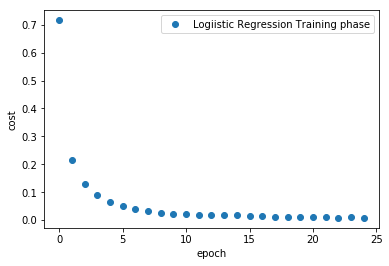

Model accuracy: 0.9683


In [3]:
# 学习率
learning_rate = 0.005
# epoch为向前和向后传播中所有批次的单次训练迭代
training_epochs = 25
# 在训练神经网络的同时，不用一次发送整个输入，一般将输入分成几个随机大小相等的块。与整个数据集一次性馈送到网络时建立的模型相比，批量训练数据使得模型更加广义化。
batch_size = 100
# 控制输出打印频率
display_step = 1
# 第一隐藏层神经元数目
n_hidden_1 = 256
# 第二隐藏层神经元数目
n_hidden_2 = 256
# 输入层节点数，这里指每个数字的像素个数28*28
n_input = 784
# 输出节点数，这里指MNIST标签个数0..9
n_classes = 10

# 定义输入图的占位符
x = tf.placeholder('float', [None, n_input])
# 定义实际分类标签的占位符
y_ = tf.placeholder('float', [None, n_classes])

# 第一隐藏层权重矩阵
h1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
# 第一隐藏层偏置向量
b1 = tf.Variable(tf.random_normal([n_hidden_1]))
# 第一隐藏层激活函数
l1 = tf.nn.sigmoid(tf.add(tf.matmul(x,h1), b1))
# 第二隐藏层权重矩阵
h2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
# 第二隐藏层偏置向量
b2 = tf.Variable(tf.random_normal([n_hidden_2]))
# 第二隐藏层激活函数
l2 = tf.nn.sigmoid(tf.add(tf.matmul(l1,h2), b2))
# 输出层权重矩阵
ho = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
# 输出层偏置向量
bo = tf.Variable(tf.random_normal([n_classes]))
# 输出层
y = tf.matmul(l2, ho) + bo

# 成本函数
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
# 优化模型算法
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 设置plot参数
avg_set = []
epoch_set = []

# 初始化变量
init = tf.global_variables_initializer()
# 启动计算图
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)
        # 该循环的每个步骤中，都会随机抓取训练数据中的100个批处理数据点，然后用这些数据点作为参数替换之前的占位符来运行optimizer操作
        for i in range(total_batch):
            # 获取size为batch_size大小的数据
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 使用batch数据训练模型
            sess.run(optimizer, feed_dict={x: batch_xs, y_: batch_ys})
            # 计算成本函数
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y_: batch_ys})/total_batch
        # 每隔display_step打印一次
        if epoch % display_step == 0:
            print('Epoch:', '%04d' %(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch)
    print('Trainig phase finished!')
    # 可视化结果
    plt.plot(epoch_set, avg_set, 'o', label='Logiistic Regression Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    # 测试评估模型
    # argmax给出给定张量中在指定轴axis上的最大值的位置（索引）
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    # 计算准确度accuracy，cast函数是类型转换函数，将索引值转换为浮点数
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
    print('Model accuracy:', accuracy.eval({x: mnist.test.images, y_: mnist.test.labels}))